In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
import scikit_posthocs as sp

In [2]:
data = pd.read_excel("output.xlsx", index_col=0, names = ['Название', 'Страна', 'КП', 'IMDB', 'Жанр_1', 'Жанр_2', 'Жанр_3'])

In [3]:
data

,Название,Страна,КП,IMDB,Жанр_1,Жанр_2,Жанр_3
0,Лорды раздевалки (видео),США,9.44,9.3,для взрослых,спорт,NaN
1,Depeche Mode: Devotional (видео),Великобритания,9.16,9.2,документальный,музыка,концерт
2,Малышарики (сериал),Россия,9.11,7.3,мультфильм,детский,семейный
3,Побег из Шоушенка,США,9.10,9.3,драма,NaN,NaN
4,Он вам не Димон,Россия,9.08,8.9,документальный,NaN,NaN
...,...,...,...,...,...,...,...
24913,Приключения в Тридесятом царстве,Россия,1.16,2.1,детский,фэнтези,приключения
24914,Время перемен,Россия,1.15,1.7,драма,NaN,NaN
24915,Мантикора,Россия,1.11,1.2,триллер,NaN,NaN
24916,Кавказская пленница!,Россия,1.11,1.2,комедия,NaN,NaN


In [4]:
cleardf = list(data['Жанр_1'].value_counts()[data['Жанр_1'].value_counts()<100].index) #список жанров для исключения 

In [5]:
data.query(f'Жанр_1 not in {cleardf}', inplace = True) #удаление жанров с < 100 нахождений

In [6]:
datarating = data.get(['Название', 'Жанр_1', 'Страна'])

In [7]:
datarating['rating'] = data['КП'] - data['IMDB'] #создание столбца рейтинга (разницы оценок)

C:\Users\User\AppData\Local\Temp/ipykernel_14976/3324359838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datarating['rating'] = data['КП'] - data['IMDB']


In [8]:
datarating

,Название,Жанр_1,Страна,rating
1,Depeche Mode: Devotional (видео),документальный,Великобритания,-0.04
2,Малышарики (сериал),мультфильм,Россия,1.81
3,Побег из Шоушенка,драма,США,-0.20
4,Он вам не Димон,документальный,Россия,0.18
5,Зеленая миля,драма,США,0.46
...,...,...,...,...
24912,Юбилей прокурора,комедия,Россия,0.07
24914,Время перемен,драма,Россия,-0.55
24915,Мантикора,триллер,Россия,-0.09
24916,Кавказская пленница!,комедия,Россия,-0.09


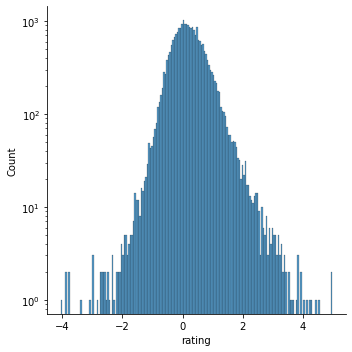

In [9]:
sns.displot(data=datarating, x="rating", log_scale = (False, True), kde=False)

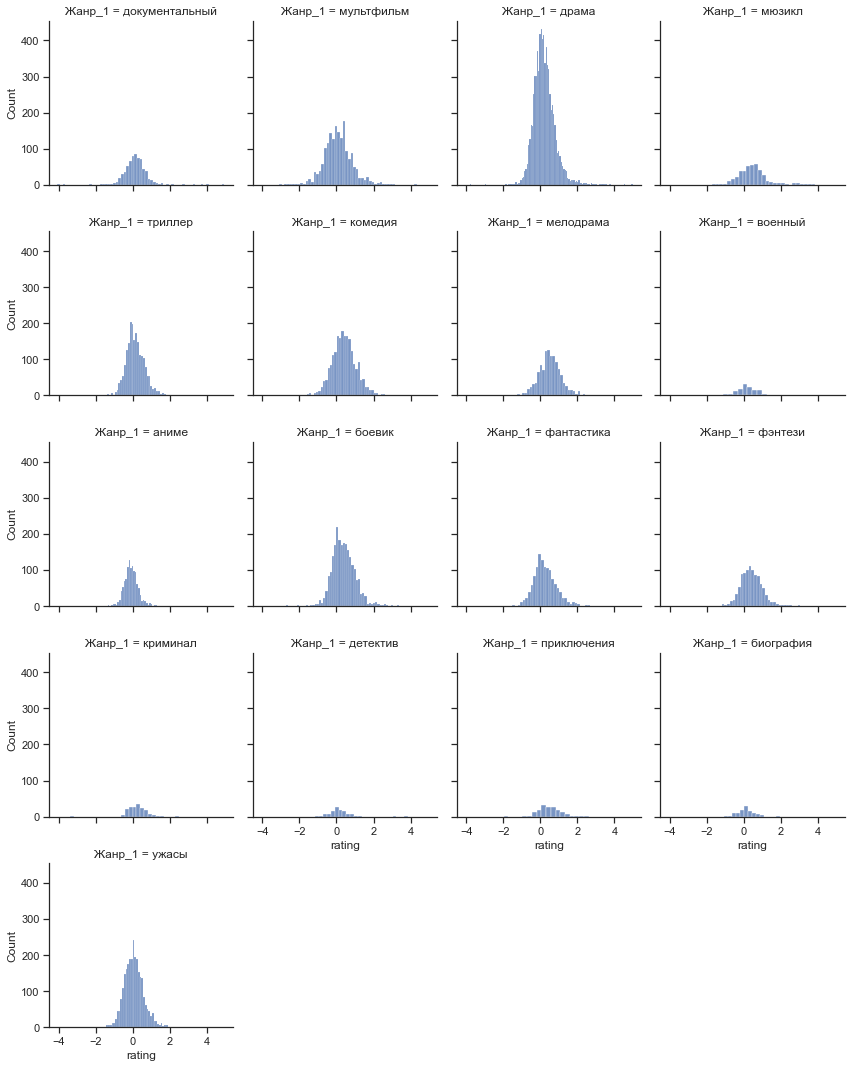

In [26]:
j = sns.FacetGrid(datarating, col="Жанр_1", col_wrap=4)
j.map(sns.histplot, "rating")

In [24]:
stats.normaltest(datarating['rating']) #тест на нормальность распределения 

NormaltestResult(statistic=3285.1006553280413, pvalue=0.0)

In [11]:
drg = datarating.groupby(['Жанр_1'])

In [12]:
groups = []
for group in list(drg.groups):
    groups.append(list(drg.get_group(group)['rating'].round(3)))   #создание пожанрового списка рейтингов 
stats.kruskal(*groups) #непараметрический тест на равность распределений

KruskalResult(statistic=1639.646012402479, pvalue=0.0)

<AxesSubplot:xlabel='rating', ylabel='Жанр_1'>

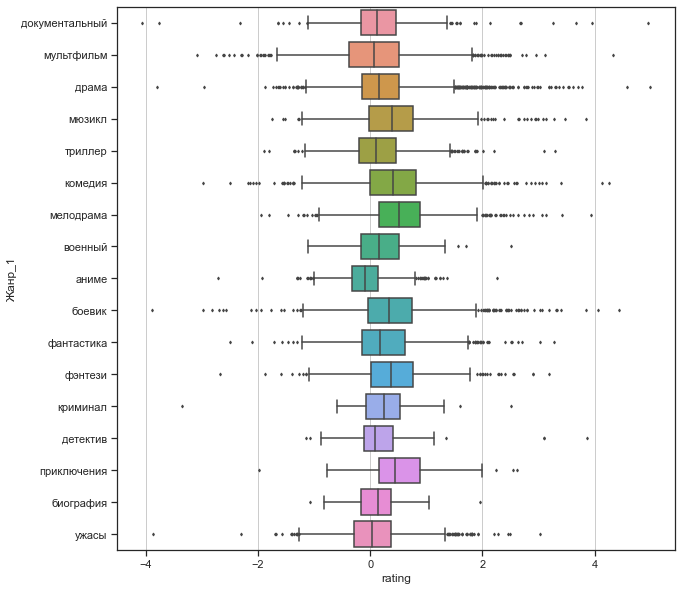

In [27]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 10))
ax.xaxis.grid(True)
sns.boxplot(x="rating", y="Жанр_1", data=datarating, fliersize = 2)


In [13]:
dp = sp.posthoc_dunn(datarating, val_col = 'rating', group_col = 'Жанр_1', p_adjust = 'hommel') 
dp.apply(lambda x: x > 0.5).style.highlight_max(color = 'yellowgreen').highlight_min(color='coral') 
#таблица попарных тестов на равность распределений 

,аниме,биография,боевик,военный,детектив,документальный,драма,комедия,криминал,мелодрама,мультфильм,мюзикл,приключения,триллер,ужасы,фантастика,фэнтези
аниме,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
биография,False,True,False,True,True,True,True,False,True,False,True,False,False,True,True,True,False
боевик,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True
военный,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,True,False
детектив,False,True,False,True,True,True,True,False,True,False,True,False,False,True,True,True,False
документальный,False,True,False,True,True,True,True,False,False,False,True,False,False,True,False,False,False
драма,False,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False
комедия,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,True
криминал,False,True,True,True,True,False,True,False,True,False,False,False,False,False,False,True,False
мелодрама,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


In [22]:
drg.agg('mean').sort_values('rating', ascending=False)

,rating
Жанр_1,
мелодрама,0.534660
приключения,0.520710
мюзикл,0.452464
комедия,0.418970
фэнтези,0.396195
боевик,0.387444
фантастика,0.255598
криминал,0.249655
драма,0.209300
